In [97]:
# Project Description: Predicting Heart Disease Using Logistic Regression
#The objective of this project is to Predict whether a patient has heart disease based on key medical parameters. 
# For this project we use libraries like Numpy, pandas, matplotlib, seaborn
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# This section is to suppresses warnings generated by the code:
def warn(*args,**kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')


In [98]:
# Data selection 
# We will use Heart disease dataset containing medical parameters  to predict wheather patient has heart disease or not. The dataset is taken from (https://www.kaggle.com/datasets/ketangangal/heart-disease-dataset-uci) from a provided source file and is available on kaggle. the dataset contains columns like 
df = pd.read_csv("C:/Users/ganga/Downloads/HeartDiseaseTrain-Test.csv")

In [99]:
# Display first few rows
print("\nThe first five rows of the dataset are:")
print(df.head())


The first five rows of the dataset are:
   age     sex chest_pain_type  resting_blood_pressure  cholestoral  \
0   52    Male  Typical angina                     125          212   
1   53    Male  Typical angina                     140          203   
2   70    Male  Typical angina                     145          174   
3   61    Male  Typical angina                     148          203   
4   62  Female  Typical angina                     138          294   

      fasting_blood_sugar               rest_ecg  Max_heart_rate  \
0    Lower than 120 mg/ml  ST-T wave abnormality             168   
1  Greater than 120 mg/ml                 Normal             155   
2    Lower than 120 mg/ml  ST-T wave abnormality             125   
3    Lower than 120 mg/ml  ST-T wave abnormality             161   
4  Greater than 120 mg/ml  ST-T wave abnormality             106   

  exercise_induced_angina  oldpeak        slope vessels_colored_by_flourosopy  \
0                      No      1.0  Downsl

In [100]:
# Information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [101]:
# Check for missing values
print("\n Missing values are:")
df.isnull().sum()


 Missing values are:


age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

In [102]:
# Checking for duplicates
df.drop_duplicates()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,Female,Non-anginal pain,120,211,Lower than 120 mg/ml,Normal,115,No,1.5,Flat,Zero,Fixed Defect,1
733,44,Female,Non-anginal pain,108,141,Lower than 120 mg/ml,ST-T wave abnormality,175,No,0.6,Flat,Zero,Fixed Defect,1
739,52,Male,Typical angina,128,255,Lower than 120 mg/ml,ST-T wave abnormality,161,Yes,0.0,Downsloping,One,Reversable Defect,0
843,59,Male,Asymptomatic,160,273,Lower than 120 mg/ml,Normal,125,No,0.0,Downsloping,Zero,Fixed Defect,0


In [103]:
# Feature Engineering
# Preprocessing the data
x = df.drop(columns=['target'])
y = df['target']

numerical_cols = x.select_dtypes(include=['int64', 'float64']).columns  # Identifying numerical and catergorical columns
categorical_cols = x.select_dtypes(include=['object']).columns

scalar = StandardScaler()  # Preprocessing for numerical

categorical_transformer = OneHotEncoder(handle_unknown='ignore')  # Preprocessing for categorical data
#preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scalar, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# fit the preprocessing pipeline
x_scaled = preprocessor.fit_transform(x)

print(x_scaled)


[[-0.26843658 -0.37763552 -0.65933209 ...  0.          0.
   1.        ]
 [-0.15815703  0.4791073  -0.83386117 ...  0.          0.
   1.        ]
 [ 1.71659547  0.76468824 -1.39623266 ...  0.          0.
   1.        ]
 ...
 [-0.81983438 -1.23437834  0.56237149 ...  0.          0.
   0.        ]
 [-0.4889957  -1.23437834  0.15513696 ...  0.          0.
   0.        ]
 [-0.04787747 -0.66321646 -1.12474297 ...  0.          0.
   1.        ]]


In [104]:
# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size =0.2, random_state=42)
print(f" Training samples:{x_train.shape[0]}, Testing samples: {x_test.shape[0]}")


 Training samples:820, Testing samples: 205


In [105]:
#Train logistic regression model 
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [106]:
#Predict on test data
y_predict = model.predict(x_test)

In [107]:
#Print Accuracy
accuracy = accuracy_score(y_test,y_predict)
print(f"Model Accuracy:{accuracy:.2f}")

Model Accuracy:0.82


In [108]:
# Evaluating Mdel performance
# Confusion matrix
cm = confusion_matrix(y_test,y_predict)
print("\n Confusion matrix")
print(cm)


 Confusion matrix
[[76 26]
 [11 92]]


In [109]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test,y_predict))


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.75      0.80       102
           1       0.78      0.89      0.83       103

    accuracy                           0.82       205
   macro avg       0.83      0.82      0.82       205
weighted avg       0.83      0.82      0.82       205



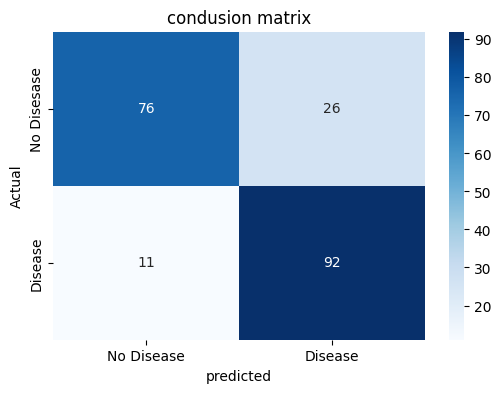

In [110]:
#Plot confussion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",xticklabels=["No Disease", "Disease"],yticklabels=["No Disesase", "Disease"])
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.title("condusion matrix")
plt.show()